In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

In [2]:
hr = pd.read_csv(r"C:\Users\patil\Desktop\Know IT CADC\Adv Analytics\Cases\human-resources-analytics\HR_comma_sep.csv")
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,support,low
14991,0.37,0.48,2,160,3,0,1,0,support,low
14992,0.37,0.53,2,143,3,0,1,0,support,low
14993,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
hr.shape

(14995, 10)

In [4]:
dumm = pd.get_dummies(hr, drop_first=True)

print(dumm.shape)

(14995, 19)


In [5]:
train, test = train_test_split(dumm, random_state=23, test_size=0.3, stratify=dumm['left'])

print(train.shape)

(10496, 19)


In [6]:
x_train = train.drop('left', axis=1)
y_train = train['left']

x_test = test.drop('left', axis=1)
y_test = test['left'] 

In [7]:
depth = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
scores = []

for i in depth:
    dtc = DecisionTreeClassifier(random_state=23, max_depth=i)
    dtc.fit(x_train, y_train)
    
    y_pred = dtc.predict(x_test)
    
    scores.append(accuracy_score(y_test, y_pred))
    
max_score = np.max(scores)
index = np.argmax(scores)
best_depth = depth[index]

In [8]:
print("Best Depth -", best_depth)
print("Index of best depth =", index)
print("Best Score =", max_score)

Best Depth - 9
Index of best depth = 7
Best Score = 0.9786619248721938


In [9]:
dtc = DecisionTreeClassifier(random_state=23, max_depth=9)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=23)

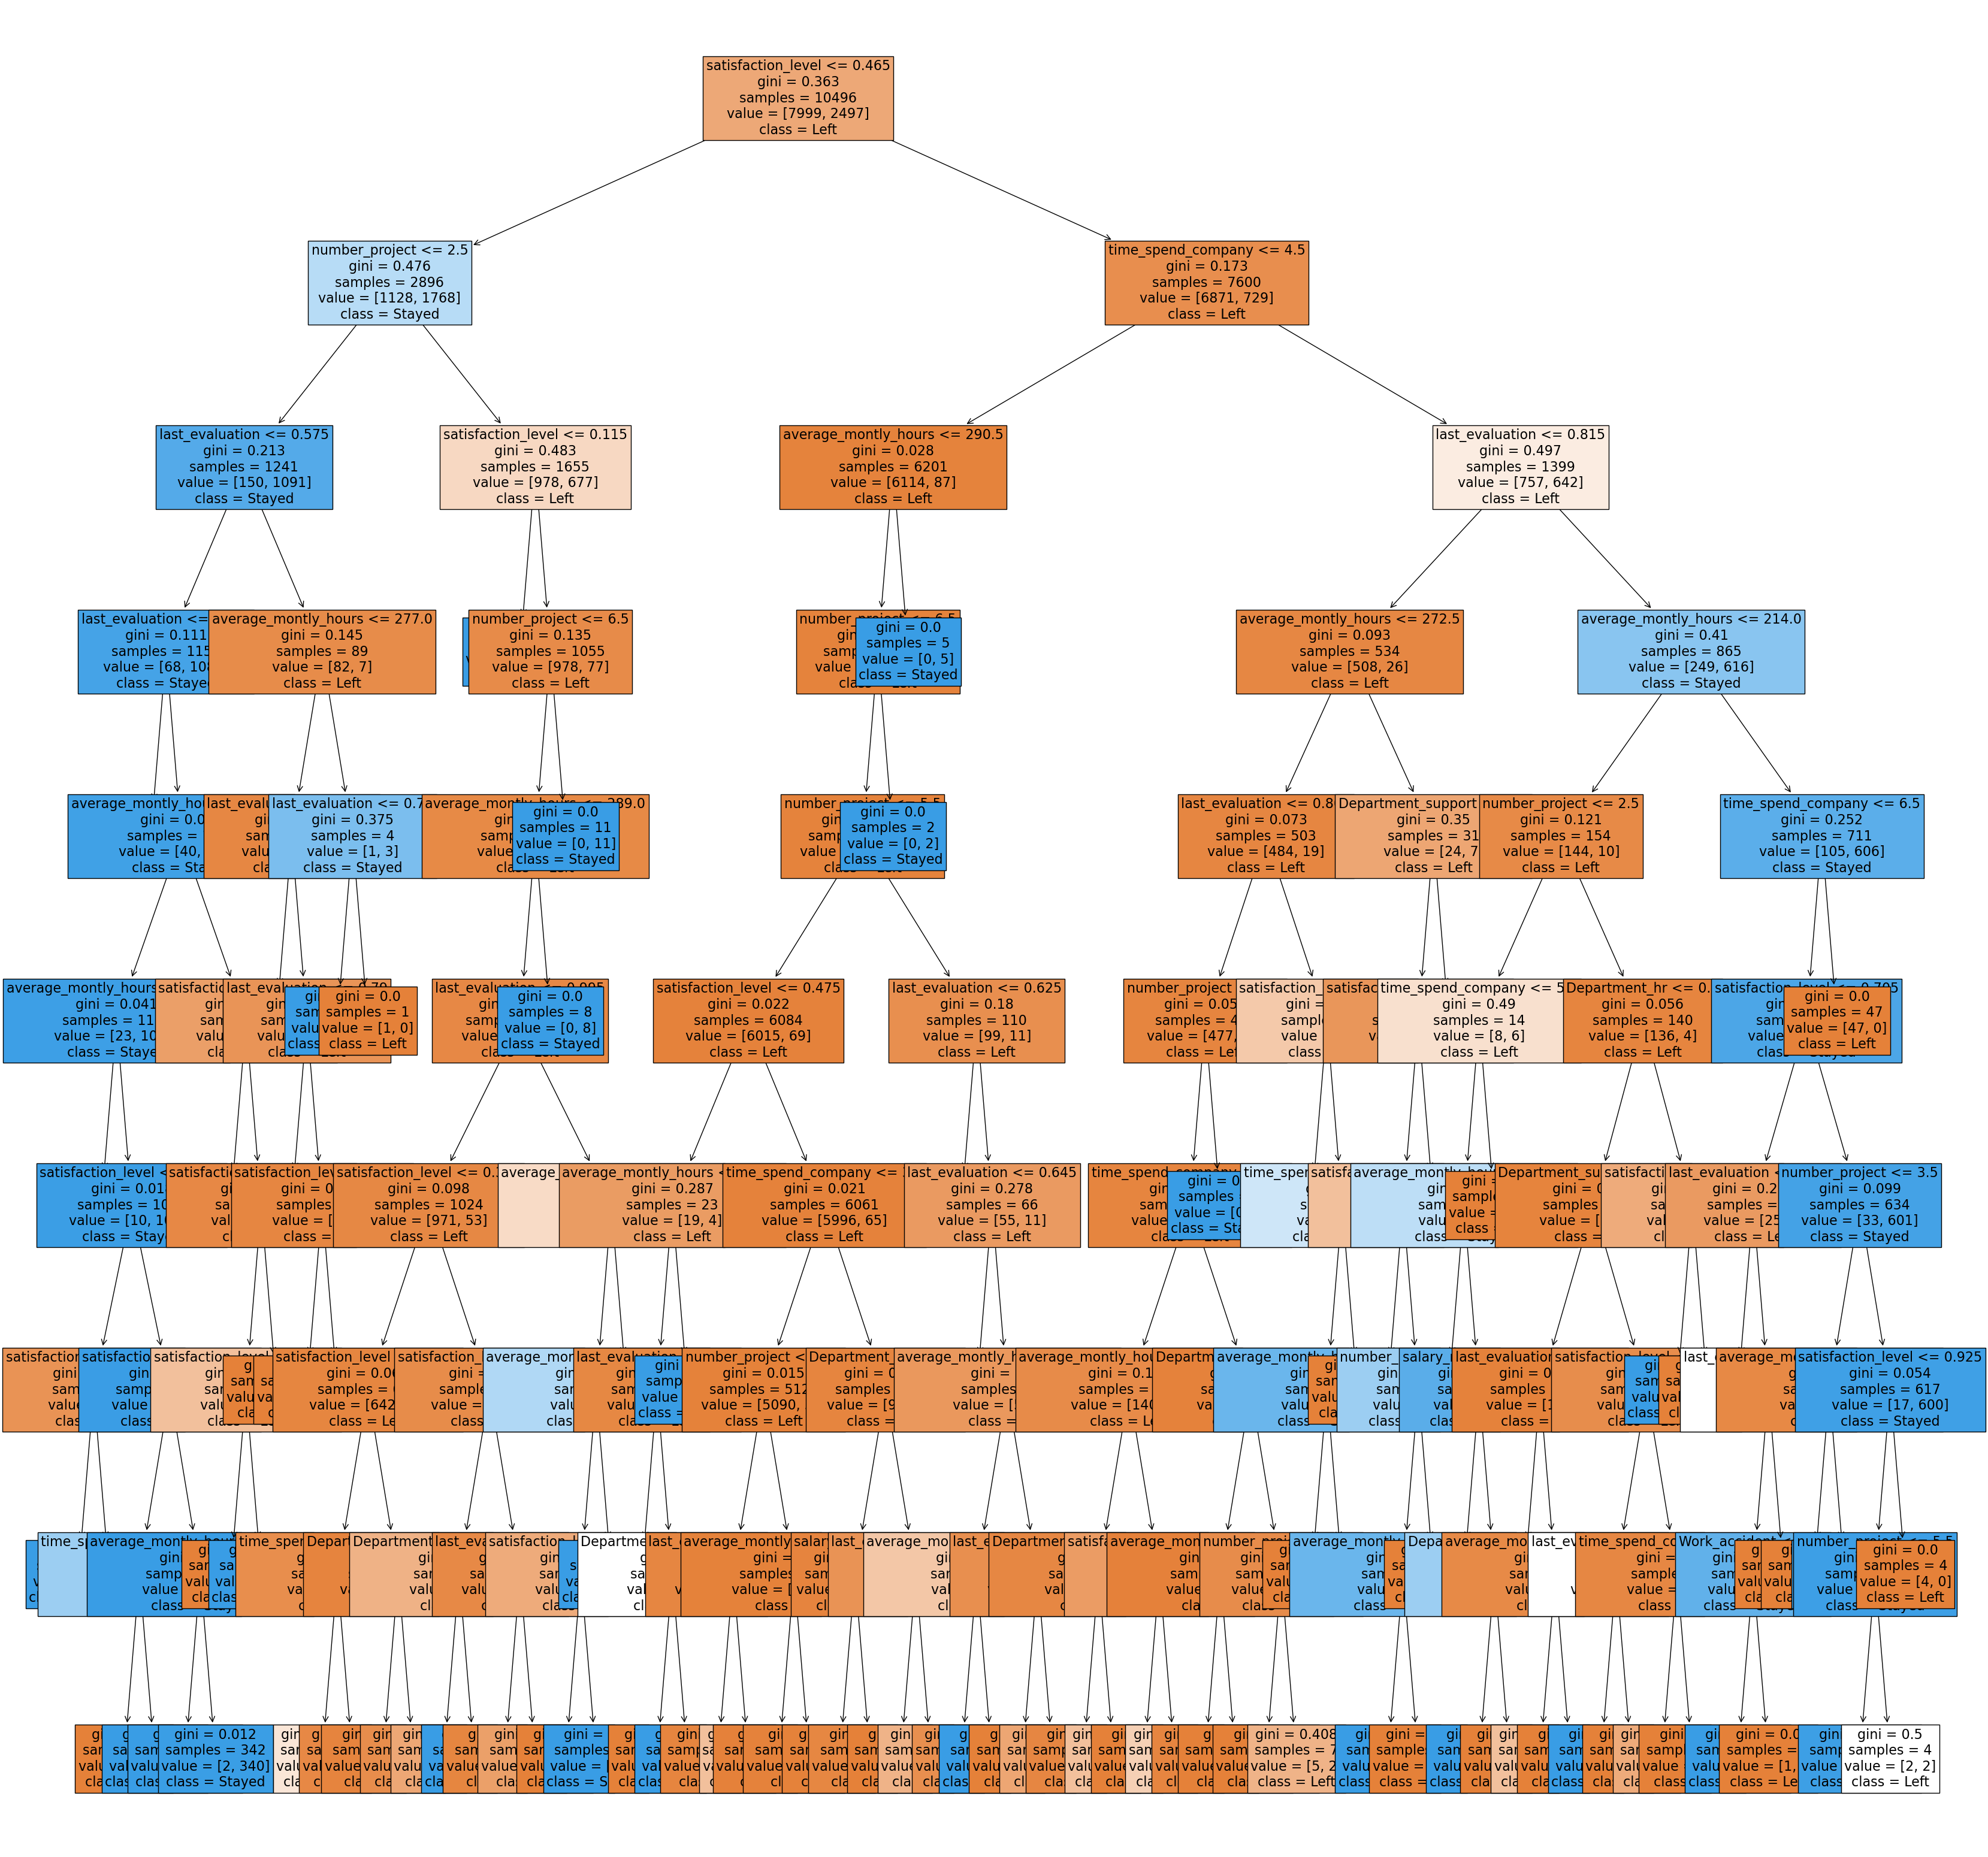

In [10]:
plt.figure(figsize=(40, 40))
tree.plot_tree(dtc, feature_names=x_train.columns, filled=True,fontsize=16, class_names=['Left', 'Stayed']) 
plt.show()

In [11]:
y_pred = dtc.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print("Accuracy Score =", accuracy_score(y_test, y_pred))


[[3412   17]
 [  79  991]]
Accuracy Score = 0.9786619248721938


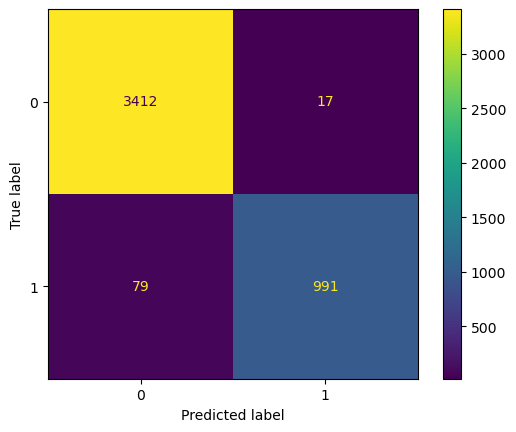

In [12]:
cm = confusion_matrix(y_test, y_pred, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)

disp.plot()
plt.show()

# Cluster

In [13]:
us = pd.read_csv(r"C:\Users\patil\Desktop\Know IT CADC\Adv Analytics\Datasets\USArrests.csv" , index_col = 0)
us

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [14]:
# Scaling the Data

scaler = MinMaxScaler()
us_scl = scaler.fit_transform(us)

# us_scl in in array form so converting it into Data Frame
us_scl = pd.DataFrame(us_scl, columns=us.columns, index=us.index)

In [15]:
us_scl.head(5)

,Murder,Assault,UrbanPop,Rape
Alabama,0.746988,0.654110,0.440678,0.359173
Alaska,0.554217,0.746575,0.271186,0.961240
Arizona,0.439759,0.852740,0.813559,0.612403
Arkansas,0.481928,0.496575,0.305085,0.315245
California,0.493976,0.791096,1.000000,0.860465


C:\Users\patil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

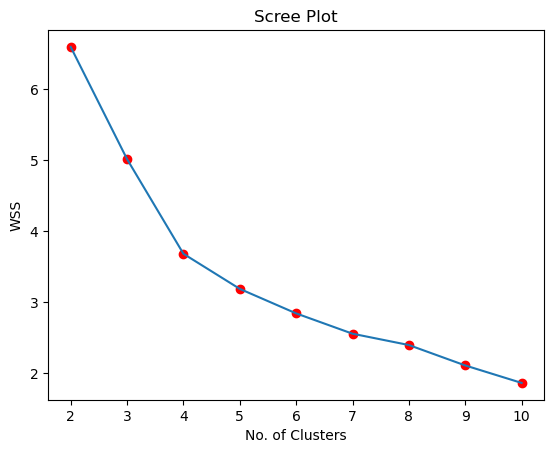

In [16]:
# Examining the number of clusters
wss = []
nos = [2,3,4,5,6,7,8,9,10]
for i in nos:
    km = KMeans(n_clusters=i, random_state=23)
    km.fit(us_scl)
    wss.append(km.inertia_)
    
# Printing the plot to see how much difference the no.of clusters make    

plt.plot(nos, wss)
plt.scatter(nos,wss, color="red")
plt.title("Scree Plot")
plt.xlabel("No. of Clusters")
plt.ylabel("WSS")
plt.show()

In [17]:
# Clustering the data
km = KMeans(n_clusters=4, random_state=23)
km.fit(us_scl)

# km_inertia_ = show the distance of how far each data point is from its cluster center
print(km.inertia_)

# km.labels_ = shows which row is in which cluster in list form
print(km.labels_)

# Printing the table with cluster numbers
clust_us = us.copy()
clust_us['Cluster'] = km.labels_
clust_us.sort_values('Cluster')



C:\Users\patil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3.683456153585913
[0 2 2 0 2 2 1 1 2 0 1 3 2 1 3 1 3 0 3 2 1 2 3 0 1 3 3 2 3 1 2 2 0 3 1 1 1
 1 1 0 3 0 2 1 3 1 1 3 3 1]


,Murder,Assault,UrbanPop,Rape,Cluster
Alabama,13.2,236,58,21.2,0
Mississippi,16.1,259,44,17.1,0
North Carolina,13.0,337,45,16.1,0
Georgia,17.4,211,60,25.8,0
South Carolina,14.4,279,48,22.5,0
Louisiana,15.4,249,66,22.2,0
Arkansas,8.8,190,50,19.5,0
Tennessee,13.2,188,59,26.9,0
Utah,3.2,120,80,22.9,1
Rhode Island,3.4,174,87,8.3,1


In [18]:
# Mean of each cluster column wise
clust_us.groupby('Cluster').mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,13.937500,243.625000,53.750000,21.412500
1,5.852941,141.176471,73.647059,19.335294
2,10.966667,264.000000,76.500000,33.608333
3,3.600000,78.538462,52.076923,12.176923


In [19]:
nutrient = pd.read_csv(r"C:\Users\patil\Desktop\Know IT CADC\Adv Analytics\Datasets\nutrient.csv" , index_col = 0)
nutrient

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7
CHICKEN BROILED,115,20,3,8,1.4
CHICKEN CANNED,170,25,7,12,1.5
BEEF HEART,160,26,5,14,5.9
LAMB LEG ROAST,265,20,20,9,2.6


In [20]:
# Scaling the Data

scaler = MinMaxScaler()

nu_scl = scaler.fit_transform(nutrient)

nu_scl = pd.DataFrame(nu_scl, columns=nutrient.columns, index=nutrient.index)

In [21]:
nu_scl.head(5)

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,0.786667,0.684211,0.710526,0.011050,0.381818
HAMBURGER,0.533333,0.736842,0.421053,0.011050,0.400000
BEEF ROAST,1.000000,0.421053,1.000000,0.005525,0.272727
BEEF STEAK,0.880000,0.631579,0.815789,0.011050,0.381818
BEEF CANNED,0.360000,0.789474,0.236842,0.033149,0.581818


C:\Users\patil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

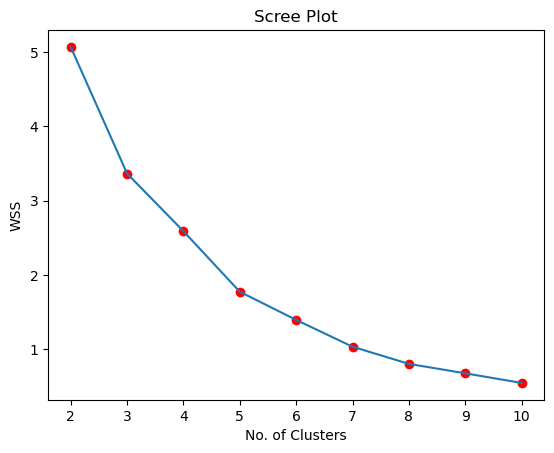

In [22]:
# Examining the number of clusters
wss = []
nos = [2,3,4,5,6,7,8,9,10]
for i in nos:
    km = KMeans(n_clusters=i, random_state=23)
    km.fit(nu_scl)
    wss.append(km.inertia_)
    
plt.plot(nos, wss)
plt.scatter(nos,wss, color="red")
plt.title("Scree Plot")
plt.xlabel("No. of Clusters")
plt.ylabel("WSS")
plt.show()

In [23]:
# Clustering the data
km = KMeans(n_clusters=5, random_state=23)
km.fit(nu_scl)
print(km.inertia_)
print(km.labels_)

clust_nu = nutrient.copy()
clust_nu['Cluster'] = km.labels_
clust_nu.sort_values('Cluster')


C:\Users\patil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1.7762415844992667
[0 1 0 0 1 3 1 1 0 0 0 0 0 1 1 3 2 2 3 3 3 3 3 3 4 1 1]


,energy,protein,fat,calcium,iron,Cluster
Food_Item,,,,,,
BEEF BRAISED,340,20,28,9,2.6,0
BEEF ROAST,420,15,39,7,2.0,0
BEEF STEAK,375,19,32,9,2.6,0
PORK SIMMERED,355,19,30,9,2.4,0
PORK ROAST,340,19,29,9,2.5,0
SMOKED HAM,340,20,28,9,2.5,0
LAMB LEG ROAST,265,20,20,9,2.6,0
LAMB SHOULDER ROAST,300,18,25,9,2.3,0
VEAL CUTLET,185,23,9,9,2.7,1


In [24]:
clust_us.groupby('Cluster').mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,13.937500,243.625000,53.750000,21.412500
1,5.852941,141.176471,73.647059,19.335294
2,10.966667,264.000000,76.500000,33.608333
3,3.600000,78.538462,52.076923,12.176923


In [25]:
loan = pd.read_csv(r"C:\Users\patil\Desktop\Know IT CADC\Adv Analytics\missing data set\Loan_Prediction.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [26]:
loan = loan.drop('Loan_ID', axis = 1)

In [27]:
loan.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
loan['Dependents'] = loan['Dependents'].replace('3+', 4)

In [29]:
loan['Gender'] = loan['Gender'].fillna(loan['Gender'].mode()[0])
loan['Married'] = loan['Married'].fillna(loan['Married'].mode()[0])
loan['Self_Employed'] = loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])
loan['LoanAmount'] = loan['LoanAmount'].fillna(loan['LoanAmount'].median())
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].median())
loan['Credit_History'] = loan['Credit_History'].fillna(loan['Credit_History'].mode()[0])
loan['Dependents'] = loan['Dependents'].fillna(loan['Dependents'].median())

In [30]:
loan.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
dumm = pd.get_dummies(loan, drop_first=True)
print(dumm.shape)

(614, 16)


In [32]:
dumm.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_4,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,1,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,1,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,1,0,0,0,0,0,1,1


In [33]:
train, test = train_test_split(dumm, random_state=23, test_size=0.3)

print(train.shape)

(429, 16)


In [34]:
x_train = train.drop('Loan_Status_Y', axis=1)
y_train = train['Loan_Status_Y']

x_test = test.drop('Loan_Status_Y', axis=1)
y_test = test['Loan_Status_Y']

In [35]:
depth = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
score = []

for i in depth:
    dtc = DecisionTreeClassifier(random_state=23, max_depth=i)
    dtc.fit(x_train, y_train)
    
    y_pred = dtc.predict(x_test)
    
    score.append(accuracy_score(y_test, y_pred))
    
best_score = np.max(score)
index = np.argmax(score)
best_depth = depth[index]

In [36]:
print("Best score =", best_score)
print("Best depth =", best_depth)

Best score = 0.7675675675675676
Best depth = 2


In [37]:
dtc = DecisionTreeClassifier(random_state=23, max_depth = best_depth)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=23)

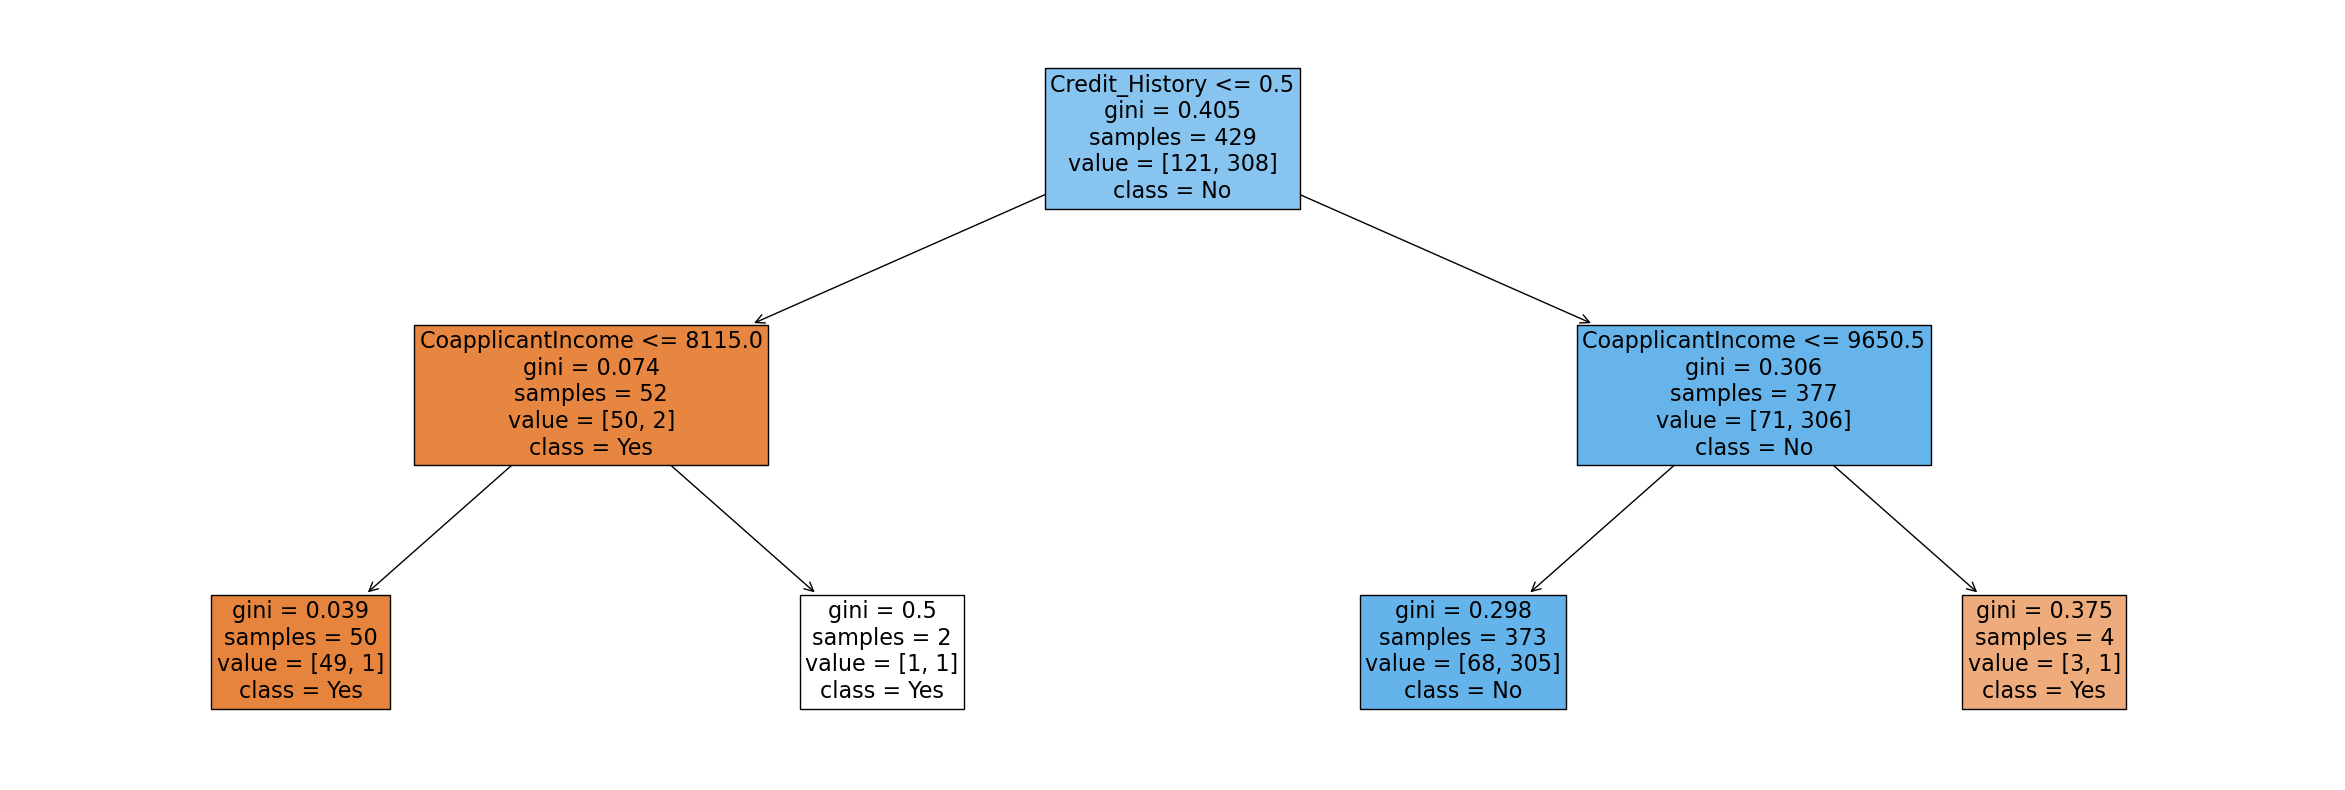

In [38]:
plt.figure(figsize=(30, 10))
tree.plot_tree(dtc, feature_names=x_train.columns, filled=True,fontsize=16, class_names=['Yes', 'No']) 
plt.show()

In [39]:
y_pred = dtc.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print("Accuracy Score =", accuracy_score(y_test, y_pred))

[[ 33  38]
 [  5 109]]
Accuracy Score = 0.7675675675675676


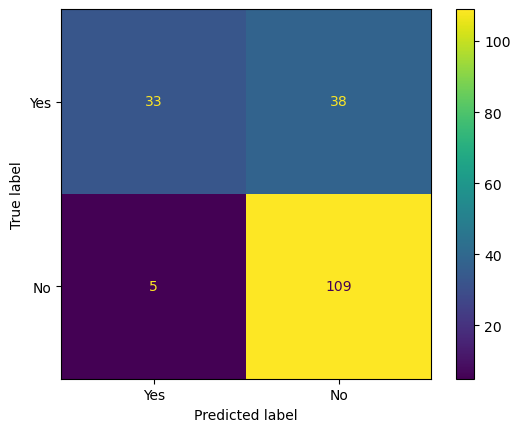

In [40]:
cm = confusion_matrix(y_test, y_pred, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Yes', 'No'])

disp.plot()
plt.show()